Exploratory Data Analysis of Telco Churn dataset (by: Aadi Deshpande)

In [1]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the graphs in the notebook
%matplotlib inline

In [2]:
tdata = pd.read_csv('telco-cust-churn.csv')

In [3]:
tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tdata.shape #no. of rows and columns

(7043, 21)

In [28]:
tdata.info()
#remove customer id as it is not useful 
tdata.drop(['customerID'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [29]:
tdata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [30]:
 #tdata.isnull().sum()
# there are no missing values in the dataset
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


% of non churners are  73.46
% of churners are  26.54


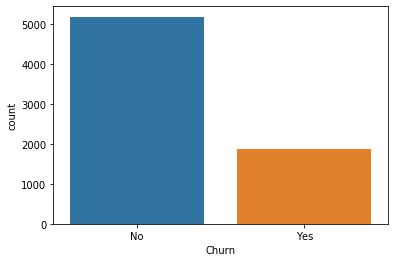

In [8]:
sns.countplot(x='Churn', data=tdata)
x,y = tdata['Churn'].value_counts()
print('% of non churners are ' , round(x/7043 * 100,2))
print('% of churners are ' , round(y/7043 * 100,2))

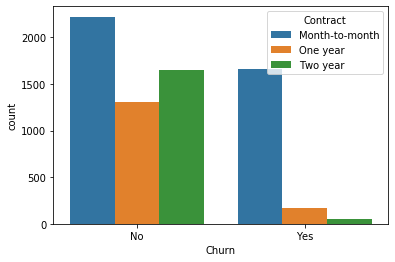

In [9]:
sns.countplot(x='Churn',hue='Contract', data = tdata)


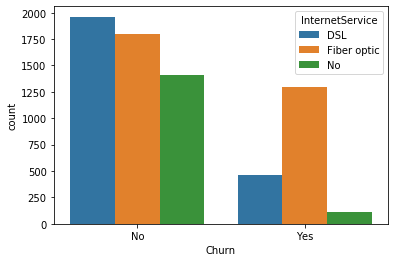

In [38]:
sns.countplot(x='Churn',hue='InternetService', data = tdata)
#most customers more likely to churn have a fiber optic connection

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

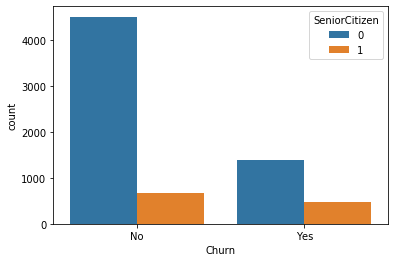

In [10]:
sns.countplot(x='Churn',hue='SeniorCitizen', data = tdata)
tdata['SeniorCitizen'].value_counts()

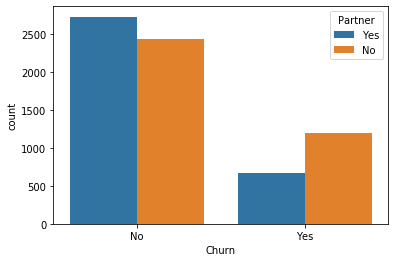

In [11]:
sns.countplot(x='Churn', hue='Partner', data=tdata)

Male      3555
Female    3488
Name: gender, dtype: int64

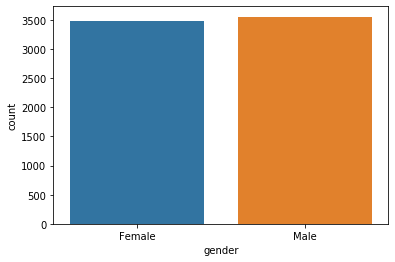

In [13]:
sns.countplot(x='gender', data = tdata)
tdata['gender'].value_counts()
#there are the almost the same number of males and females in the data

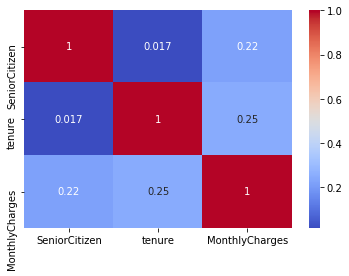

In [14]:
sns.heatmap(tdata.corr(),annot=True, cmap='coolwarm')
#could not find correlation between any two labels
#a better correlation has been ploted later

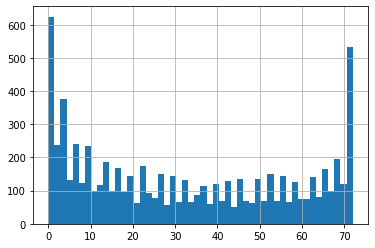

In [15]:
tdata['tenure'].hist(bins=50) #majority has tenure between 0-10 and 60-70

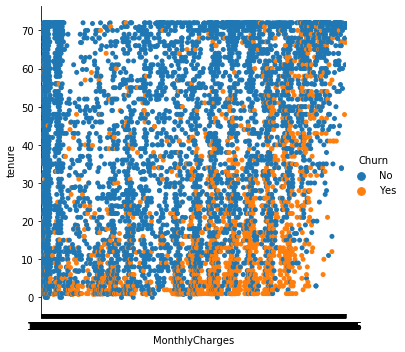

In [16]:
sns.catplot(x='MonthlyCharges', y = 'tenure',hue='Churn',data= tdata)
#people with low tenure and high monthly charges are more likely to change the service provider

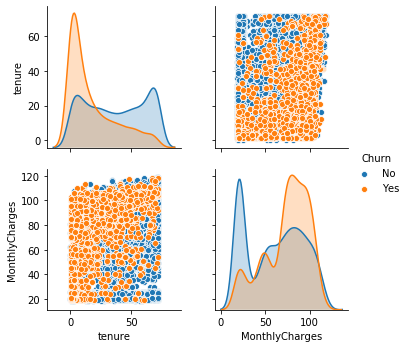

In [25]:
ppdata1 = tdata[['tenure', 'MonthlyCharges', 'Churn']]
sns.pairplot(data = ppdata1, hue='Churn')
#customers having higher tenure are more likely to change their 

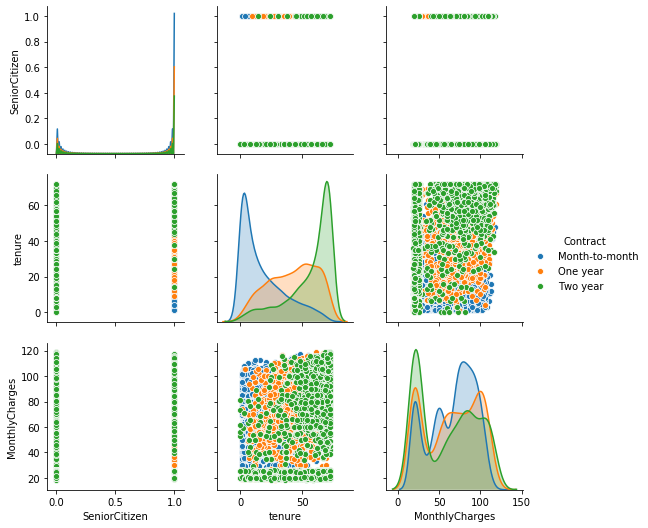

In [26]:
sns.pairplot(data=tdata, hue='Contract')
#most customers who have a two year contract have high tenure 

In [48]:

#Let us plot a better correlation map.
#we convert the Yes and No to 1 and 0 respectively
gender = pd.get_dummies(tdata['gender'],drop_first=True)
senior = pd.get_dummies(tdata['SeniorCitizen'], drop_first = True)
partner = pd.get_dummies(tdata['Partner'], drop_first = True)
depend = pd.get_dummies(tdata['Dependents'], drop_first = True)
phservice = pd.get_dummies(tdata['PhoneService'], drop_first = True)
onlinesec = pd.get_dummies(tdata['OnlineSecurity'], drop_first = True)
onlinebkp = pd.get_dummies(tdata['OnlineBackup'], drop_first = True)
deviceprotect = pd.get_dummies(tdata['DeviceProtection'], drop_first = True)
techsupport = pd.get_dummies(tdata['TechSupport'], drop_first = True)
streamtv = pd.get_dummies(tdata['StreamingTV'], drop_first = True)
streammovie = pd.get_dummies(tdata['StreamingMovies'], drop_first = True)
paperless = pd.get_dummies(tdata['PaperlessBilling'], drop_first = True)
churn = pd.get_dummies(tdata['Churn'], drop_first = True)
#tdata.drop(['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling' ] ])

#intservice_new = pd.get_dummies(tdata['InternetService'], drop_first = True)
#newdata = pd.get_dummies(tdata[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService']])
#newdata.head()

In [56]:
#newdata = tdata.drop(['gender', 'SeniorCitizen','Partner','Dependents', 'PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling' ] ,axis = 1)
#newdata.head()
#newdata = pd.concat([gender, senior,partner,depend,phservice,onlinesec,onlinebkp,deviceprotect,techsupport,streamtv, streammovie,paperless,churn],axis = 1)

In [57]:
#newdata

In [62]:

newdata = pd.get_dummies(tdata[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling']])
newdata.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,1,0,0,1,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0
4,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [72]:
plt.figure(figsize=(20,15))
sns.heatmap(newdata.corr(), cmap='coolwarm',annot = true)

NameError: name 'true' is not defined

<Figure size 1440x1080 with 0 Axes>